In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

In [2]:
data = pd.read_csv("Fuel_Consumption.csv")

In [3]:
data.head()

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230


In [4]:
data.tail()

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
634,2000,VOLVO,V70 AWD TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,14.4,288
635,2000,VOLVO,V70 GLT TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,13.6,274
636,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,A4,Z,13.9,274
637,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,M5,Z,13.0,260
638,2000,VOLVO,V70R AWD TURBO,STATION WAGON - MID-SIZE,2.4,5,A5,Z,14.7,299


In [5]:
data.isnull().sum()

Year                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
COEMISSIONS         0
dtype: int64

In [6]:
data.describe()

,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
count,639.0,639.000000,639.000000,639.000000,639.000000
mean,2000.0,3.265728,5.805947,14.713615,296.809077
std,0.0,1.231012,1.625588,3.307044,65.504178
min,2000.0,1.000000,3.000000,4.900000,104.000000
25%,2000.0,2.200000,4.000000,12.500000,253.000000
50%,2000.0,3.000000,6.000000,14.400000,288.000000
75%,2000.0,4.300000,6.000000,16.600000,343.000000
max,2000.0,8.000000,12.000000,30.200000,582.000000


In [7]:
data.duplicated().sum()

1

In [8]:
# data = data.drop(columns=['MAKE'])

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.dropna(inplace=True)

In [11]:
data.duplicated().sum()

0

In [12]:
mean_fuel_consumption = data['FUEL CONSUMPTION'].mean()
data['High_Fuel'] = (data['FUEL CONSUMPTION'] > mean_fuel_consumption).astype(int)

In [13]:
categorical_columns = ['MAKE', 'MODEL', 'VEHICLE CLASS', 'FUEL', 'TRANSMISSION']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [14]:
x = data.drop(columns=['High_Fuel'])
y = data['High_Fuel']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [16]:
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
model.intercept_

array([-4.91276611e-05])

In [18]:
model.coef_

array([[-5.52280254e-02,  5.60463313e-01, -2.08903551e-01,
         2.07608884e+00,  2.67953998e-01,  5.23984085e-01,
        -4.55222200e-01,  4.52850133e-01, -2.57197509e-01,
        -1.37469200e-01, -8.46570163e-02, -3.91053218e-06,
        -1.12658006e-01, -5.69337314e-07,  3.33310185e-01,
        -9.23005317e-04, -1.36259310e-04, -7.11453080e-06,
        -3.36936006e-05,  9.73718273e-04,  4.17849642e-01,
         1.05608323e-03, -3.75426428e-02, -1.60860939e-07,
        -2.24010654e-01,  8.69230002e-02,  4.57582498e-03,
        -5.44799095e-01,  1.30428097e-02, -3.35091796e-03,
         4.85276002e-03,  5.76759454e-01,  3.61506774e-01,
        -1.68168936e-02, -8.13411052e-05, -3.70463291e-06,
        -4.12076518e-02, -1.99934049e-01, -1.70872813e-01,
        -5.12715065e-01, -7.10805401e-05,  0.00000000e+00,
        -1.05133285e-02, -3.38011923e-03, -2.11629337e-04,
        -2.11629337e-04, -5.41951838e-04, -5.37519160e-04,
        -1.47189297e-07, -1.67001594e-07, -1.67001594e-0

In [19]:
y_pred = model.predict(x_test)

In [20]:
y_test

149    0
252    0
73     1
419    0
312    1
      ..
239    1
468    0
78     1
319    0
264    1
Name: High_Fuel, Length: 128, dtype: int32

In [21]:
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1])

In [22]:
y_pred_prob = model.predict_proba(x_test)
y_pred_prob

array([[9.99970698e-01, 2.93017318e-05],
       [1.00000000e+00, 4.09931908e-13],
       [8.64850252e-07, 9.99999135e-01],
       [9.37881259e-01, 6.21187410e-02],
       [1.99271904e-03, 9.98007281e-01],
       [1.00000000e+00, 1.52684371e-18],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.99295178e-25],
       [3.16857651e-13, 1.00000000e+00],
       [5.89461813e-12, 1.00000000e+00],
       [9.39846481e-01, 6.01535191e-02],
       [7.30466726e-01, 2.69533274e-01],
       [7.36264344e-01, 2.63735656e-01],
       [4.52876403e-10, 1.00000000e+00],
       [9.99952649e-01, 4.73512535e-05],
       [1.10279967e-02, 9.88972003e-01],
       [1.00000000e+00, 1.31366543e-10],
       [1.00000000e+00, 6.53053146e-12],
       [9.24958913e-05, 9.99907504e-01],
       [5.14233101e-12, 1.00000000e+00],
       [2.15086120e-01, 7.84913880e-01],
       [9.99995633e-01, 4.36737165e-06],
       [9.15219244e-04, 9.99084781e-01],
       [0.00000000e+00, 1.00000000e+00],
       [9.999293

In [23]:
y_pred_prob = model.predict_proba(x_test)[:, 1]
y_pred_prob

array([2.93017318e-05, 4.09931908e-13, 9.99999135e-01, 6.21187410e-02,
       9.98007281e-01, 1.52684371e-18, 1.00000000e+00, 1.99295178e-25,
       1.00000000e+00, 1.00000000e+00, 6.01535191e-02, 2.69533274e-01,
       2.63735656e-01, 1.00000000e+00, 4.73512535e-05, 9.88972003e-01,
       1.31366543e-10, 6.53053146e-12, 9.99907504e-01, 1.00000000e+00,
       7.84913880e-01, 4.36737165e-06, 9.99084781e-01, 1.00000000e+00,
       7.06578746e-05, 1.27867264e-08, 9.97853652e-01, 1.00000000e+00,
       9.99999246e-01, 7.84474940e-08, 1.50593587e-03, 9.99999957e-01,
       1.00000000e+00, 9.99999995e-01, 9.96318003e-01, 9.99953690e-01,
       1.00000000e+00, 4.92543698e-17, 5.62615296e-19, 1.00000000e+00,
       4.27040524e-01, 2.45702237e-03, 9.77307314e-01, 9.99999692e-01,
       9.93738886e-01, 1.49625778e-08, 1.15365736e-09, 4.89856240e-07,
       1.00000000e+00, 1.00000000e+00, 1.33024613e-06, 4.41156764e-10,
       7.25819757e-08, 9.96928866e-01, 4.93993904e-01, 2.21585949e-16,
      

In [24]:
confusion_matrix(y_test, y_pred)

array([[67,  2],
       [ 2, 57]], dtype=int64)

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()
data_normalised = scaler.fit_transform(data)

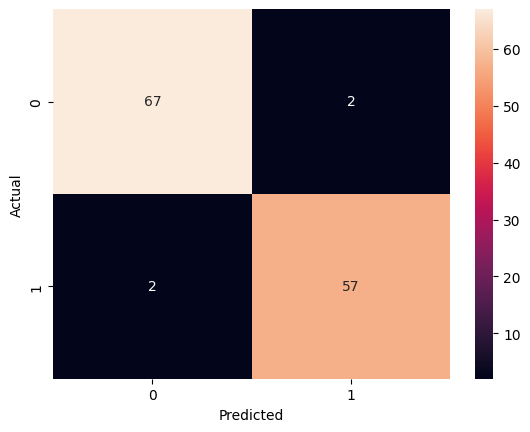

In [27]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
accuracy_score(y_test, y_pred)

0.96875

In [29]:
classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        69
           1       0.97      0.97      0.97        59

    accuracy                           0.97       128
   macro avg       0.97      0.97      0.97       128
weighted avg       0.97      0.97      0.97       128



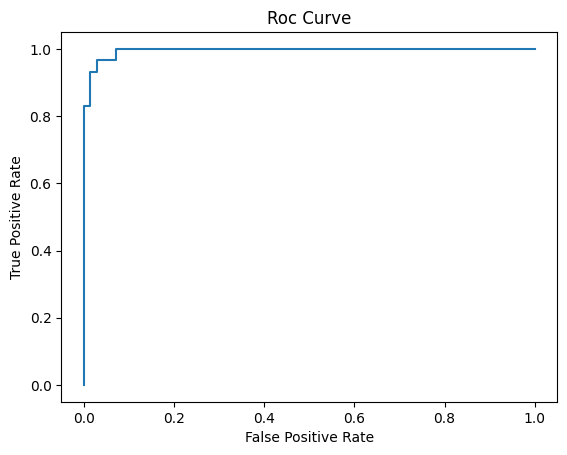

In [30]:
fpr, tpr,_ = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.title('Roc Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [31]:
roc_auc_score(y_test, y_pred_prob)

0.995087202161631